In [1]:
import statsmodels.api as sm

import sys
sys.path.append('../src')

from yf_dataset import *
from ta_features import *
from preprocessing import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

In [2]:
ticker = 'ko'
label = 'KO'
start_date = '2010-01-01'
close_price_period = '1d'
target_pct_change_period = 30 # n = period

In [3]:
amd_df = get_stock_data(ticker, start_date, period=close_price_period)
format_col_names(amd_df)
add_pct_ch_and_future(amd_df, period = target_pct_change_period)
add_sma(amd_df, [14, 20, 50, 100, 200])
add_rsi(amd_df, [14, 20, 50, 100, 200])
add_ema(amd_df, [14, 20, 50, 100, 200])
# TODO: add more features (volume)
# Other models we're about to use will be able to learn non-linear relationships between the features and targets. This includes random forests, gradient boosting, and neural networks.
amd_df.dropna(inplace=True)
amd_df

# Using Percent Change as the Target:
# Relative Prediction:

# If your focus is on predicting the direction or relative movement of prices rather than the absolute level, using percent change is more appropriate. It captures the proportional change in the close price.
# Scale Independence:

# Percent change is scale-independent, meaning it is not affected by the magnitude of the close price. This can be advantageous when dealing with assets with different price levels.
# Common Approach in Finance:

# In financial modeling, predicting percentage returns or changes is a common practice. It aligns with the idea of measuring investment performance in relative terms.
# Better Handling of Non-Stationarity:

# Financial time series data often exhibits non-stationarity, where the statistical properties change over time. Percent change can help address this by focusing on relative movements.

[*********************100%%**********************]  1 of 1 completed


c:\Users\user\Desktop\FMLProject\FML\notebooks\../src\ta_features.py:14: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[str(period) + 'd_close_future_pct'] = df[str(period) + 'd_future_close'].pct_change(period) #calc future % change


,Open,High,Low,Close,Adj_Close,Volume,30d_close_pct,30d_future_close,30d_close_future_pct,sma14,...,rsi14,rsi20,rsi50,rsi100,rsi200,ema14,ema20,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,29.980000,30.235001,29.915001,30.170000,20.205591,35052800,0.054955,21.815321,0.079668,19.951105,...,72.849803,70.474200,63.196719,58.366561,55.624673,19.945473,19.838007,19.328368,18.799389,18.110702
2010-10-20,30.184999,30.840000,30.184999,30.575001,20.476843,32398000,0.065420,21.882757,0.068659,20.014012,...,78.297424,74.502976,64.989416,59.423420,56.360580,20.016322,19.898849,19.373406,18.832606,18.134245
2010-10-21,30.504999,30.875000,30.504999,30.735001,20.583992,23266400,0.062544,21.747889,0.056544,20.070220,...,80.004190,75.871924,65.663580,59.830288,56.646013,20.092011,19.964100,19.420880,18.867287,18.158621
2010-10-22,30.745001,30.870001,30.715000,30.805000,20.630877,9534600,0.060778,21.575932,0.045808,20.135518,...,80.718725,76.454199,65.956277,60.007529,56.770357,20.163860,20.027603,19.468331,18.902209,18.183220
2010-10-25,30.645000,30.875000,30.495001,30.504999,20.429958,21228200,0.051353,21.626509,0.058568,20.167808,...,69.291535,68.948419,63.586057,58.882904,56.077646,20.199340,20.065922,19.506042,18.932462,18.205576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,54.130001,54.330002,53.560001,54.029999,54.029999,20909700,-0.100749,58.029999,0.074033,55.302857,...,34.458125,34.121745,38.414474,43.429280,47.350751,55.041473,55.710472,57.609445,58.792466,59.314691
2023-10-11,54.220001,54.279999,53.020000,53.709999,53.709999,21138900,-0.105188,58.419998,0.087693,55.029286,...,33.026724,33.028455,37.823933,43.086409,47.171120,54.863943,55.519950,57.456526,58.691823,59.258923
2023-10-12,53.759998,53.830002,52.430000,52.810001,52.810001,19330400,-0.119746,58.570000,0.109070,54.687143,...,29.335733,30.166895,36.225709,42.141236,46.670664,54.590084,55.261860,57.274309,58.575351,59.194755


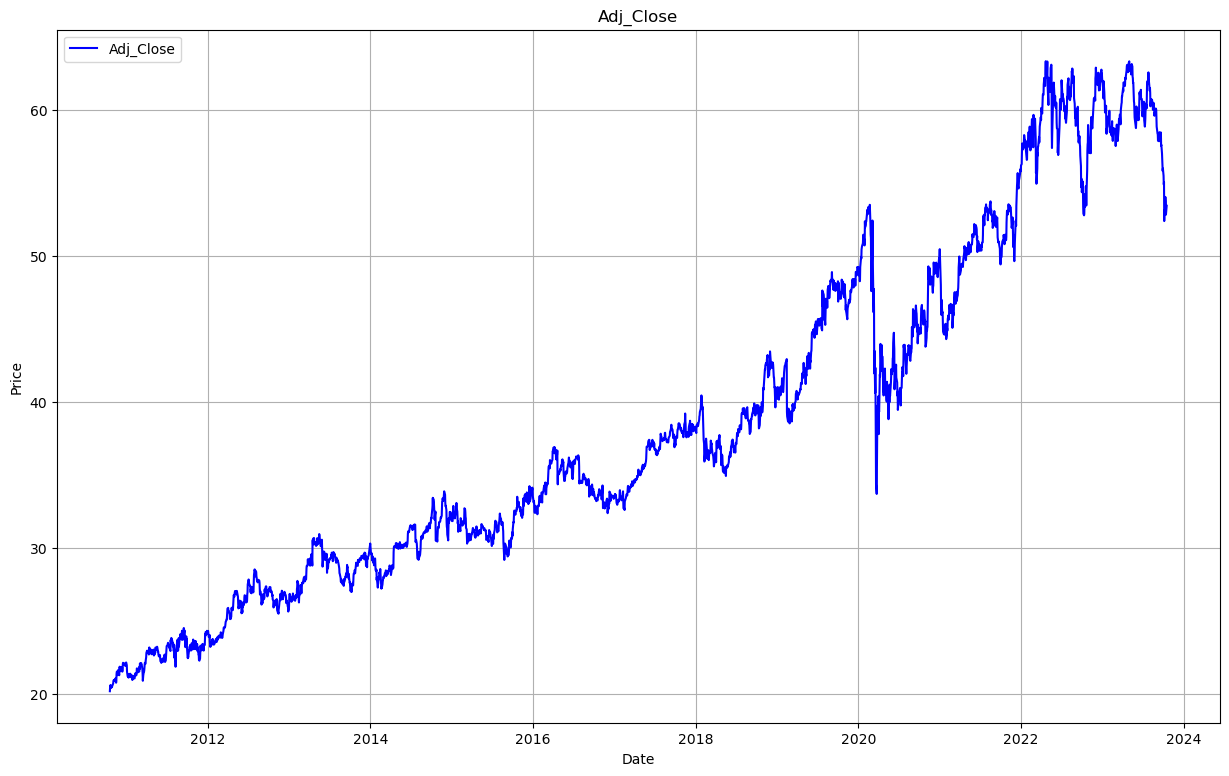

In [4]:
# Plotting
plt.figure(figsize=(15, 9))

# Plot Adj_Close
plt.plot(amd_df['Adj_Close'], label='Adj_Close', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj_Close')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
amd_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', '30d_close_pct',
       '30d_future_close', '30d_close_future_pct', 'sma14', 'sma20', 'sma50',
       'sma100', 'sma200', 'rsi14', 'rsi20', 'rsi50', 'rsi100', 'rsi200',
       'ema14', 'ema20', 'ema50', 'ema100', 'ema200'],
      dtype='object')

In [6]:
features, target = split_features_target(amd_df, f'{target_pct_change_period}d_close_future_pct', [f'{target_pct_change_period}d_future_close',f'{target_pct_change_period}d_close_pct'])

In [7]:
X = amd_df[features]
y = amd_df[target]
X.shape,y.shape
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'sma14', 'sma20',
       'sma50', 'sma100', 'sma200', 'rsi14', 'rsi20', 'rsi50', 'rsi100',
       'rsi200', 'ema14', 'ema20', 'ema50', 'ema100', 'ema200'],
      dtype='object')

In [8]:
scaler = StandardScaler()
# pca = PCA(n_components=20)

X = scaler.fit_transform(X)
# X = pca.fit_transform(X)
# Convert scaled data back to a DataFrame for demonstration
X = pd.DataFrame(X, columns=features)
X = X.set_index(y.index)
X

c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be

,Open,High,Low,Close,Adj_Close,Volume,sma14,sma20,sma50,sma100,...,rsi14,rsi20,rsi50,rsi100,rsi200,ema14,ema20,ema50,ema100,ema200
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,-1.842153,-1.832802,-1.831023,-1.821362,-1.565381,3.155080,-1.582857,-1.589904,-1.630067,-1.687694,...,1.727046,1.873613,1.956607,1.700536,1.440531,-1.584602,-1.592223,-1.627236,-1.657221,-1.685132
2010-10-20,-1.818404,-1.763280,-1.799442,-1.774414,-1.542097,2.743211,-1.577453,-1.585702,-1.627412,-1.684624,...,2.209750,2.310293,2.296618,2.018708,1.794218,-1.578510,-1.586987,-1.623344,-1.654330,-1.683053
2010-10-21,-1.781334,-1.759258,-1.762013,-1.755866,-1.532899,1.326520,-1.572624,-1.580521,-1.624032,-1.681430,...,2.360984,2.458674,2.424483,2.141197,1.931401,-1.572001,-1.581372,-1.619241,-1.651312,-1.680901
2010-10-22,-1.753530,-1.759833,-1.737450,-1.747752,-1.528875,-0.803852,-1.567014,-1.576218,-1.620371,-1.678516,...,2.424297,2.521786,2.479997,2.194556,1.991162,-1.565823,-1.575907,-1.615141,-1.648273,-1.678729
2010-10-25,-1.765115,-1.759258,-1.763183,-1.782528,-1.546122,1.010311,-1.564240,-1.572750,-1.617079,-1.675873,...,1.411754,1.708234,2.030451,1.855983,1.658236,-1.562772,-1.572609,-1.611882,-1.645640,-1.676755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10,0.955540,0.935993,0.934638,0.944525,1.338096,0.960898,1.454324,1.532983,1.740510,1.865733,...,-1.674775,-2.066636,-2.743700,-2.796399,-2.536028,1.433267,1.494887,1.680711,1.823190,1.953237
2023-10-11,0.965966,0.930247,0.871476,0.907430,1.310627,0.996457,1.430821,1.514632,1.727447,1.858683,...,-1.801609,-2.185138,-2.855705,-2.899621,-2.622361,1.418001,1.478491,1.667497,1.814432,1.948313
2023-10-12,0.912676,0.878538,0.802466,0.803101,1.233372,0.715883,1.401426,1.490349,1.712506,1.850827,...,-2.128661,-2.495303,-3.158831,-3.184170,-2.862887,1.394452,1.456281,1.651751,1.804296,1.942646


In [9]:
X = sm.add_constant(X)

In [10]:
X_train, y_train, X_test, y_test = train_test_split(0.85, X, y)

In [11]:
y_train

Date
2010-10-19    0.079668
2010-10-20    0.068659
2010-10-21    0.056544
2010-10-22    0.045808
2010-10-25    0.058568
                ...   
2021-10-26    0.017560
2021-10-27   -0.004225
2021-10-28    0.012071
2021-10-29    0.032605
2021-11-01    0.036999
Name: 30d_close_future_pct, Length: 2779, dtype: float64

In [12]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.260
Model:                              OLS   Adj. R-squared:                  0.255
Method:                   Least Squares   F-statistic:                     46.22
Date:                  Wed, 29 Nov 2023   Prob (F-statistic):          4.46e-163
Time:                          00:04:44   Log-Likelihood:                 4979.1
No. Observations:                  2779   AIC:                            -9914.
Df Residuals:                      2757   BIC:                            -9784.
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.001

In [13]:
# plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio for Each Principal Component')
# plt.show()

In [14]:
dependent_variable_name = result.model.endog_names
dependent_variable_name

'30d_close_future_pct'

In [15]:
# Log the experiment with MLflow
with mlflow.start_run():

    # Log parameters
    mlflow.log_param("ticker", ticker)
    mlflow.log_param("scaling_method", "StandardScaler" if isinstance(scaler, StandardScaler) else "MinMaxScaler")
    mlflow.log_param("start_date", start_date)
    mlflow.log_param("target_variable", dependent_variable_name)
    mlflow.log_param("features", features)
    # mlflow.log_param("pca_components", pca.n_components_)

    # Log metrics
    rsquared = result.rsquared
    mlflow.log_metric("r-squared", rsquared)

     # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Model info", "Basic OLS model for stock data")

    # Infer the model signature
    signature = infer_signature(X_train, result.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=result,
        artifact_path="ols_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="ols_simple_model",
    )

c:\Users\user\anaconda3\envs\financial_ml_env\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'ols_simple_model' already exists. Creating a new version of this model...
2023/11/29 00:04:47 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: ols_simple_model, version 7
Created version '7' of model 'ols_simple_model'.


In [16]:
# Make predictions from our model for train and test sets
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)

In [17]:
isinstance

<function isinstance(obj, class_or_tuple, /)>

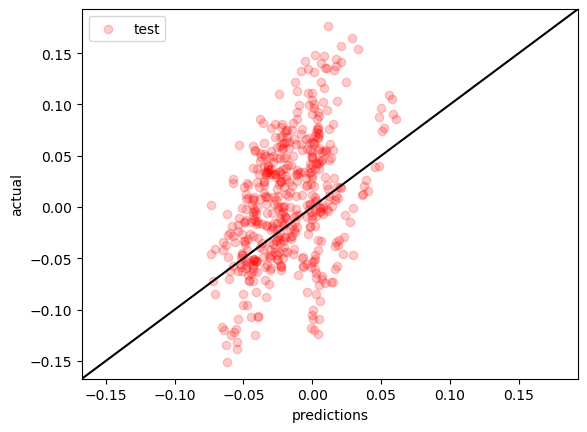

In [18]:
# Scatter the predictions vs the targets with 20% opacity
# plt.scatter(pred_train, y_train, alpha=0.2, color='b', label='train')
plt.scatter(pred_test, y_test, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
perfect_line = np.arange(min(xmin, ymin), max(xmax, ymax), 0.01)
plt.plot(perfect_line, perfect_line, c='k')

# Set the same limits on x and y axes
plt.xlim([min(xmin, ymin), max(xmax, ymax)])
plt.ylim([min(xmin, ymin), max(xmax, ymax)])

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()